In [3]:
%matplotlib inline

from pathlib import Path
from importlib import reload
import time
import traceback

import numpy as np
import pandas as pd
import scipy.stats as stats
pd.set_option('display.max_rows', 50)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')

import TreeMazeAnalyses2.Analyses.experiment_info as ei
import TreeMazeAnalyses2.Utils.robust_stats as rs
import TreeMazeAnalyses2.Analyses.spatial_functions as sf
import TreeMazeAnalyses2.Analyses.open_field_functions as of
import TreeMazeAnalyses2.Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.plot_functions as pf
import TreeMazeAnalyses2.Analyses.paper_stats as ps


import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
ei = reload(ei)
info = ei.SummaryInfo()

## Cue coding by segment

In [236]:
ei = reload(ei)
info = ei.SummaryInfo()

o = info.print_paper_stats(which='seg_rates')

interactive(children=(Dropdown(description='unit_type', options=('all', 'cell', 'mua'), value='all'), Dropdown…

In [183]:
ps = reload(ps)
lmm_stats = ps.LMM_Stats(info).segment_rates()

interactive(children=(Dropdown(description='unit_type', options=('all', 'cell', 'mua'), value='all'), Dropdown…

In [248]:
ps = reload(ps)
lmm_stats = ps.LMM_Stats(info).remap_scores()

interactive(children=(Dropdown(description='unit_type', options=('all', 'cell', 'mua'), value='all'), Dropdown…

In [249]:
ps = reload(ps)
lmm_stats = ps.LMM_Stats(info).unit_remap_to_beh()

interactive(children=(Dropdown(description='unit_type', options=('all', 'cell', 'mua'), value='all'), Dropdown…

In [202]:
ps = reload(ps)
lmm_stats = ps.LMM_Stats(info).pop_remap_to_beh()

interactive(children=(Dropdown(description='unit_type', options=('all', 'cells', 'muas'), value='all'), Dropdo…

In [235]:
ps = reload(ps)
lmm_stats = ps.LMM_Stats(info).zone_encoder_scores()

interactive(children=(Dropdown(description='unit_type', options=('all', 'cell', 'mua'), value='all'), Dropdown…

In [339]:
ps = reload(ps)
lmm_stats = ps.LMM_Stats(info).open_field_models()

interactive(children=(Dropdown(description='unit_type', options=('all', 'cell', 'mua'), value='all'), Dropdown…

In [55]:
ps = reload(ps)
lmm_stats = ps.LMM_Stats(info).of_cluster_TM_comps()

interactive(children=(Dropdown(description='score_group', options=('of_coef', 'of_metrics', 'tm_remap', 'tm_en…

In [26]:
cluster_table = info.get_matched_of_cell_clusters()
match_table = info.get_unit_match_table()
cm_table = match_table[['match_cl_id', 'subject', 'session_T3', 'session_OF']].copy()
cm_table[['cluster', 'umap_1', 'umap_2']] = cluster_table.loc[cm_table['match_cl_id'], ['Cluster','UMAP-1','UMAP-2']].values
cm_table['cluster'] = cm_table.cluster.astype(pd.api.types.CategoricalDtype())

scores = info.get_combined_scores_matched_units(mean_multi_matches=False)

In [50]:
score_group='tm_enc_r2'
cluster_type ='cluster'
of_vars = ['speed', 'hd', 'pos']
if score_group == 'of_coef':
    score_columns = [f"OF-{m}-agg_sdp_coef" for m in of_vars]
    abbreviations = of_vars
elif score_group == 'of_metrics':
    score_columns = [f'OF-metric_score_{m}' for m in of_vars]
    abbreviations = of_vars
elif score_group == 'tm_remap':
    score_columns = ['TM-remap_cue', 'TM-remap_rw']
    abbreviations = ['cue', 'rw']
elif score_group == 'tm_enc_r2':
    score_columns = ['TM-rate_cue', 'TM-global_cue', 'TM-rate_rw', 'TM-global_rw', ]
    abbreviations = [s.split('-')[1] for s in score_columns]
elif score_group == 'tm_enc_delta':
    score_columns = ['TM-enc_uz_cue', 'TM-enc_uz_rw']
    abbreviations = ['cue', 'rw']
else:
    raise ValueError

df = scores[score_columns].copy()
df[['match_cl_id', 'subject', 'session_TM', 'session_OF']] = cm_table[['match_cl_id', 'subject',
                                                                          'session_T3', 'session_OF']].copy()
df[cluster_type] = cm_table[cluster_type].copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


df=df.rename(columns={b:a for a,b in zip(abbreviations,score_columns) })
df = df.melt(id_vars=[cluster_type, 'subject', 'match_cl_id', 'session_TM', 'session_OF'], value_name='score', var_name=score_group)
df

,cluster,subject,match_cl_id,session_TM,session_OF,tm_enc_r2,score
0,0.0,Li,0,Li_T3g_061318,Li_OF_061318,rate_cue,0.043149
1,1.0,Li,1,Li_T3g_061518,Li_OF_062618,rate_cue,0.023974
2,1.0,Li,1,Li_T3g_061818,Li_OF_062618,rate_cue,0.026001
3,2.0,Li,2,Li_T3g_061818,Li_OF_061818,rate_cue,0.024433
4,2.0,Li,2,Li_T3g_061818,Li_OF_062618,rate_cue,0.024433
...,...,...,...,...,...,...,...
743,2.0,Cl,206,Cl_T3g_120918,Cl_OF_120918,global_rw,0.369734
744,1.0,Cl,208,Cl_T3g_121118,Cl_OF_121018,global_rw,0.284363
745,2.0,Ca,212,Ca_T3g_030519,Ca_OF_030419,global_rw,-0.102196
746,2.0,Ca,212,Ca_T3g_030519,Ca_OF_030519,global_rw,-0.102196


In [52]:
df.tm_enc_r2.apply(lambda x:(x.split('_')[1]))=='cue'

0       True
1       True
2       True
3       True
4       True
       ...  
743    False
744    False
745    False
746    False
747    False
Name: tm_enc_r2, Length: 748, dtype: bool

In [42]:
vc = {'session_TM': f"0+C(session_TM)",
              'session_OF': f"0+C(session_OF)",
              'match_id': f"0+C(match_cl_id)"
              }

model_full = smf.mixedlm(formula=f"score ~ 1 + {score_group}*{cluster_type}",
                  groups='subject', re_formula='1', vc_formula=vc, data=df).fit()
model_full.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                   MixedLM        Dependent Variable:        score   
No. Observations:        921            Method:                    REML    
No. Groups:              6              Scale:                     0.0355  
Min. group size:         3              Log-Likelihood:            184.4140
Max. group size:         480            Converged:                 Yes     
Mean group size:         153.5                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        0.698    0.078   8.981 0.000  0.545  0.850
of_coef[T.pos]                   0.410    0.023  17.682 0.000  0.365  0.456
of_coef[T.speed]                -1.441    0.023 -62.142 0.000 -1.487 -1.396
cluster[T.1.0]                  -0.458    0.029 -15.892 0.000 -0.514 -0.401
cluster[T.2.0]                  -0.936    0.030 -31.012 0.000 -0.995 -0.877
of_coef[T.pos]:cluster[T.1.0]    0.333    0.036   9.240 0.000  0.263  0.404
of_coef[T.speed]:cluster[T.1.0]  1.026    0.036  28.455 0.000  0.956  1.097
of_coef[T.pos]:cluster[T.2.0]    0.732    0.037  19.548 0.000  0.659  0.806
of_coef[T.speed]:cluster[T.2.0]  2.053    0.037  54.802 0.000  1.980  2.127
subject Var                      0.031                                     
match_id Var                     0.001                                     
session_OF Var                   0.000                                     
session_TM Var                   0.000                                     
===========================================================================

"""

In [44]:
model_full.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                        chi2         P>chi2  df constraint
Intercept          80.665369   2.673670e-19              1
of_coef          7030.784360   0.000000e+00              2
cluster           962.079584  1.222004e-209              2
of_coef:cluster  3143.449000   0.000000e+00              4

In [15]:
cluster_table.loc[cm_table['match_cl_id']]
# cm_table[['cluster', 'umap_1', 'umap_2']] = cm
# cluster_table.

,UMAP-1,UMAP-2,Cluster
0,-3.854654,2.271504,0
0,-3.854654,2.271504,0
1,2.951423,0.263405,1
1,2.951423,0.263405,1
2,9.045257,-0.002619,2
...,...,...,...
213,8.037321,-0.146413,2
214,5.244091,0.836049,1
214,5.244091,0.836049,1
215,3.908710,1.039502,1


In [9]:
match_table

,match_cl_id,subject,session_T3,session_OF,cl_id_T3,cl_id_OF,cl_name_T3,cl_name_OF,session_cl_id_T3,session_cl_id_OF,match_pair_number
0,0,Li,Li_T3i_061218_0001,Li_OF_061318,438,458,Li_T3i_061218_0001-tt3_d17.5_cl10,Li_OF_061318-tt3_d17.5_cl1,0,1,0
1,0,Li,Li_T3g_061318,Li_OF_061318,476,458,Li_T3g_061318-tt3_d17.5_cl5,Li_OF_061318-tt3_d17.5_cl1,0,1,1
2,1,Li,Li_T3g_061518,Li_OF_062618,563,778,Li_T3g_061518-tt3_d17.75_cl1,Li_OF_062618-tt3_d17.75_cl15,0,1,0
3,1,Li,Li_T3g_061818,Li_OF_062618,614,778,Li_T3g_061818-tt3_d17.75_cl7,Li_OF_062618-tt3_d17.75_cl15,1,1,1
4,2,Li,Li_T3g_061818,Li_OF_061818,613,587,Li_T3g_061818-tt3_d17.75_cl6,Li_OF_061818-tt3_d17.75_cl14,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
302,213,Ca,Ca_T3g_030619,Ca_OF_030619,4287,4279,Ca_T3g_030619-tt11_d15.5_cl10,Ca_OF_030619-tt11_d15.5_cl10,0,0,0
303,214,Ca,Ca_T3g_030619,Ca_OF_030619,4288,4280,Ca_T3g_030619-tt11_d15.5_cl12,Ca_OF_030619-tt11_d15.5_cl13,1,1,0
304,214,Ca,Ca_T3g_030719,Ca_OF_030619,4296,4280,Ca_T3g_030719-tt11_d15.5_cl9,Ca_OF_030619-tt11_d15.5_cl13,0,1,1
305,215,Ca,Ca_T3g_031219,Ca_OF_031219,4310,4313,Ca_T3g_031219-tt11_d16.25_cl2,Ca_OF_031219-tt11_d16.25_cl4,0,0,0


In [308]:
test_mpdel = 'agg_sdp'
unit_type = 'cell'
score_type = 'r2'
_, scores = info.get_of_results(model_analyses='new')

exclude_units = scores[(scores.value <= -1) & (scores.metric == 'r2')].unit_id.unique()
exclude_units = np.union1d(exclude_units, scores[scores.unit_type == 'mua'].unit_id.unique())
valid_untis = np.setdiff1d(scores.unit_id.unique(), exclude_units)

df = scores[scores.unit_id.isin(valid_untis)].copy()
if unit_type != 'all':
    df = df[df.unit_type == unit_type]
df = df.loc[(df.metric == score_type) & (df.split == 'test'),
            ['unit_id', 'model', 'subject', 'session', 'split', 'value', 'unit_type']].copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


models = df.model.unique()
for m in models:
    df[m] = 0
    df.loc[df.model == m, m] = 1

df['best_model'] = 'na'
for unit in df.unit_id.unique():
    idx = df.unit_id==unit
    df.loc[idx, 'best_model'] = df[idx].sort_values('value', ascending=False).model.iloc[0]



,unit_id,model,subject,session,split,value,unit_type,speed,hd,pos,agg_sdp,best_model
0,0,speed,Li,Li_OF_052818,test,0.009095,cell,1,0,0,0,agg_sdp
1,1,speed,Li,Li_OF_052818,test,-0.016607,cell,1,0,0,0,hd
2,2,speed,Li,Li_OF_052818,test,-0.009073,cell,1,0,0,0,agg_sdp
3,0,hd,Li,Li_OF_052818,test,-0.031859,cell,0,1,0,0,agg_sdp
4,1,hd,Li,Li_OF_052818,test,0.019848,cell,0,1,0,0,hd
...,...,...,...,...,...,...,...,...,...,...,...,...
2711,2217,agg_sdp,Mi,Mi_OF_021720,test,0.041835,cell,0,0,0,1,speed
2712,2219,speed,Mi,Mi_OF_021820,test,0.041633,cell,1,0,0,0,speed
2713,2219,hd,Mi,Mi_OF_021820,test,-0.001531,cell,0,1,0,0,speed
2714,2219,pos,Mi,Mi_OF_021820,test,0.007160,cell,0,0,1,0,speed


In [313]:
df.best_model.value_counts()/4, len(df.unit_id.unique()), 445+85+75+74


(agg_sdp    445.0
 speed       85.0
 hd          75.0
 pos         74.0
 Name: best_model, dtype: float64,
 679,
 679)

In [331]:
models = ['speed', 'hd', 'pos', 'agg_sdp']
test_model='agg_sdp'
r = lmm_stats.result
p = r.params.index

A = np.zeros((len(p), len(p)))
t_idx = np.nan
for ii, m in enumerate(models):
    if m==test_model:
        A[:, p == test_model] = 1
        t_idx=ii
    if m != test_model:
        A[ii, p == m] = -1
A = A[:len(models)]
A = np.delete(A,t_idx,0)

print(f"Joint Hypothesis Test: {test_model}!=all other models.")
print(r.wald_test(A))

[[-1.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.]]
Joint Hypothesis Test: agg_sdp>all other models.
<Wald test (chi2): statistic=[[653.0076245]], p-value=3.245329172875376e-141, df_denom=3>


In [332]:
r.t_test(A[:,:4])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0887      0.004     24.315      0.000       0.082       0.096
c1             0.0692      0.004     18.959      0.000       0.062       0.076
c2             0.0517      0.004     14.170      0.000       0.045       0.059

array(['speed', 'hd', 'pos', 'agg_sdp', 'subject Var', 'session Var',
       'unit_id Var'], dtype=object)

In [288]:
ii=0
m = 'speed'
A[ii, p == m] = -1
A

array([[-1.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [279]:
A = np.zeros((len(p), len(p)))
A[:, p == test_model] = 1
A

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [206]:
df[df.expt=='cue']

,session_unit_id,expt,comp,mean_test,mean_null,test_cond,null_cond,uz,md,subject,session,session_pct_cov,unit_type,tt,tt_cl,cl_name,task,unit_id
6,0,cue,fixed_v_none,8.488033e-02,8.048627e-02,fixed,none,0.151186,0.003671,Li,Li_T3g_052818,NaN,mua,2,11,Li_T3g_052818-tt2_d16.5_cl11,T3g,0
7,1,cue,fixed_v_none,2.149854e-02,1.896742e-02,fixed,none,0.302372,0.002760,Li,Li_T3g_052818,NaN,mua,2,14,Li_T3g_052818-tt2_d16.5_cl14,T3g,1
8,0,cue,none_v_inter,8.048627e-02,7.670648e-02,none,inter,0.377964,0.004767,Li,Li_T3g_052818,NaN,mua,2,11,Li_T3g_052818-tt2_d16.5_cl11,T3g,0
9,1,cue,none_v_inter,1.896742e-02,1.173904e-02,none,inter,0.226779,0.001907,Li,Li_T3g_052818,NaN,mua,2,14,Li_T3g_052818-tt2_d16.5_cl14,T3g,1
10,0,cue,inter_v_fixed,7.670648e-02,8.488033e-02,inter,fixed,-0.529150,-0.009694,Li,Li_T3g_052818,NaN,mua,2,11,Li_T3g_052818-tt2_d16.5_cl11,T3g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18868,0,cue,none_v_inter,-4.492172e-03,-2.251613e+24,none,inter,1.209486,0.007241,Ca,Ca_T3g_041919,NaN,mua,11,13,Ca_T3g_041919-tt11_d19.25_cl13,T3g,1572
18869,0,cue,inter_v_fixed,-2.251613e+24,7.077245e-04,inter,fixed,-2.041008,-0.010643,Ca,Ca_T3g_041919,NaN,mua,11,13,Ca_T3g_041919-tt11_d19.25_cl13,T3g,1572
18879,0,cue,fixed_v_none,8.747529e-03,4.314727e-04,fixed,none,1.209486,0.004987,Ca,Ca_T3g_042319,NaN,mua,11,10,Ca_T3g_042319-tt11_d19.75_cl10,T3g,1573
18880,0,cue,none_v_inter,4.314727e-04,-1.655826e+21,none,inter,1.436265,0.006846,Ca,Ca_T3g_042319,NaN,mua,11,10,Ca_T3g_042319-tt11_d19.75_cl10,T3g,1573


In [200]:
r = info.get_pop_zone_rates_remap()
r.head()

,subject,session,session_pct_cov,session_valid,n_session_all,n_session_cells,n_session_muas,pop_type,CR_bo-CL_bo-corr_m,CR_bo-CL_bo-corr_z,...,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo-Even_bo-Odd_bo-corr_ztp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_ztp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_ztp
0,Li,Li_T3g_052818,0,0,2,0,2,cells,NaN,NaN,...,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,NaN
1,Li,Li_T3g_052818,0,0,2,0,2,muas,0.235092,0.382072,...,-1.435433,1.543158e-01,0.130228,6.147307e-59,1.050551,2.960224e-01,-0.543050,6.274768e-130,-2.716187,7.794561e-03
2,Li,Li_T3g_052818,0,0,2,0,2,all,0.235092,0.382072,...,-1.435433,1.543158e-01,0.130228,6.147307e-59,1.050551,2.960224e-01,-0.543050,6.274768e-130,-2.716187,7.794561e-03
3,Li,Li_T3g_052918,0,0,14,6,8,cells,0.707729,1.455152,...,-23.319510,5.281613e-42,-5.729448,0.000000e+00,-30.469076,4.247630e-52,-8.083766,0.000000e+00,-45.138985,7.524665e-68
4,Li,Li_T3g_052918,0,0,14,6,8,muas,0.656034,1.284937,...,-19.137712,4.866298e-35,-3.993051,0.000000e+00,-27.501583,3.735268e-48,-7.018437,0.000000e+00,-43.732122,1.491006e-66


In [198]:
r = info.get_zone_rates_remap()

r.subject[(r.unit_type=='cell') & ()].value_counts()

Cl    277
Li    179
Ne     70
Al     22
Ca     20
Name: subject, dtype: int64

In [120]:
r = info.get_zone_rates_remap()
r.head()

,unit_id,subject,session,session_pct_cov,session_valid,session_unit_id,unit_type,tt,tt_cl,cl_name,...,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo-Even_bo-Odd_bo-corr_ztp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_ztp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_ztp
0,0,Li,Li_T3g_052818,0,0,0,mua,2,11,Li_T3g_052818-tt2_d16.5_cl11,...,-9.249211,4.749767e-15,-1.171844,5.430137e-104,-8.401179,3.291964e-13,-0.389703,2.703985e-82,-2.559436,1.199701e-02
1,1,Li,Li_T3g_052818,0,0,1,mua,2,14,Li_T3g_052818-tt2_d16.5_cl14,...,-0.812344,4.185431e-01,-0.388775,3.556820e-55,-3.359558,1.109696e-03,0.648024,1.742926e-75,4.899106,3.758786e-06
2,2,Li,Li_T3g_052918,0,0,0,cell,2,18,Li_T3g_052918-tt2_d16.5_cl18,...,-15.624468,1.796110e-28,-1.674764,3.351046e-96,-18.986483,9.036139e-35,-1.920430,2.931200e-121,-20.125812,9.141833e-37
3,3,Li,Li_T3g_052918,0,0,1,cell,8,0,Li_T3g_052918-tt8_d16.25_cl0,...,-4.285178,4.239197e-05,-0.455051,1.030678e-57,-3.245751,1.598732e-03,-1.123101,1.066193e-71,-9.454595,1.694033e-15
4,4,Li,Li_T3g_052918,0,0,2,cell,8,12,Li_T3g_052918-tt8_d16.25_cl12,...,-14.796472,7.948183e-27,-1.338269,2.843717e-78,-12.483734,4.792029e-22,-3.906965,0.000000e+00,-30.301465,6.959452e-52


In [185]:
comp_type = 'cue'
unit_type ='cell'
metric_type = 'zm'
if comp_type == 'cue':
    comp = 'CR_bo-CL_bo-Even_bo-Odd_bo-corr_'+metric_type
elif comp_type == 'rw':
    comp = 'Co_bi-Inco_bi-Even_bi-Odd_bi-corr_'+metric_type
else:
    raise ValueError

if unit_type == 'all':
    df = r.copy()
elif unit_type in ['cell', 'mua']:
    df = r[(r.unit_type == unit_type)].copy()
else:
    raise ValueError

df['task'] = df.session.apply(lambda x: x.split('_')[1])
df['score'] = df[comp]
df = df[['subject', 'session', 'task', 'unit_type', 'score']]
df.dropna(inplace=True)
df = df.reset_index()

vc_formula = {
   'task': "1+C(task)",
    'session': "1+C(session)"
}

if unit_type == 'all':
    full_formula = "score ~ 1 + unit_type"
else:
    full_formula = "score ~ 1"

free = sm.regression.mixed_linear_model.MixedLMParams.from_components(
    np.ones(3), np.eye(3))

m_full = smf.mixedlm(formula=full_formula,
                     groups='subject', re_formula="1", vc_formula=vc_formula,
                     data=df).fit(free=free)

print(m_full.wald_test_terms())
m_full.summary()

ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (3,)

In [184]:
m_full.converged

True

<AxesSubplot:xlabel='subject', ylabel='resid'>

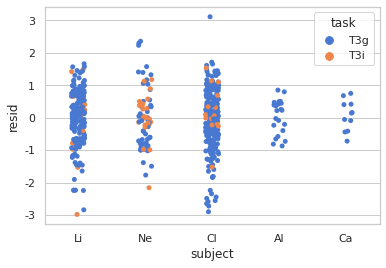

In [179]:
df['resid'] = m_full.resid
sns.stripplot(x='subject', y='resid', hue='task', data=df)

In [181]:
m_full.cov_params()

,Intercept,subject Var,session Var,task Var
Intercept,0.086715,-0.041312,0.001097,-0.003594
subject Var,-0.041312,-0.640751,-0.006730,-0.043911
session Var,0.001097,-0.006730,0.009238,-0.003350
task Var,-0.003594,-0.043911,-0.003350,0.036045


In [ ]:
m_full.

In [152]:
df.dropna?

Signature:
df.dropna(
    axis: 'Axis' = 0,
    how: 'str' = 'any',
    thresh=None,
    subset=None,
    inplace: 'bool' = False,
)
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    .. versionchanged:: 1.0.0

       Pass tuple or list to drop on multiple axes.
       Only a single axis is allowed.

how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.

thresh : int, optional
    Require

In [151]:
df.isna().sum()

index        0
subject      0
session      0
task         0
unit_type    0
score        9
dtype: int64

In [142]:
df

,index,subject,session,task,unit_type,score
0,2,Li,Li_T3g_052918,T3g,cell,-20.125812
1,3,Li,Li_T3g_052918,T3g,cell,-9.454595
2,4,Li,Li_T3g_052918,T3g,cell,-30.301465
3,5,Li,Li_T3g_052918,T3g,cell,-19.573431
4,6,Li,Li_T3g_052918,T3g,cell,-15.460217
...,...,...,...,...,...,...
563,1926,Ca,Ca_T3g_030719,T3g,cell,2.160435
564,1930,Ca,Ca_T3g_030819,T3g,cell,-0.084745
565,1936,Ca,Ca_T3g_031219,T3g,cell,0.062290
566,1978,Ca,Ca_T3g_032119,T3g,cell,-11.456815


In [95]:
ps = reload(ps)
lmm_stats = ps.LMM_Stats(info).remap_scores()

interactive(children=(Dropdown(description='unit_type', options=('all', 'cell', 'mua'), value='all'), Dropdown…

In [97]:
comp_type = 'cue'
unit_type='cell'
metric_type = 'uz_val'

seg_rates = info.get_segment_rate_comps()
if unit_type == 'all':
    df = seg_rates[seg_rates.comp==comp_type].copy()
elif unit_type in ['cell', 'mua']:
    df = seg_rates[ (seg_rates.comp==comp_type) & (seg_rates.unit_type==unit_type)].copy()

df['score'] = df[metric_type]

vc_formula={}
if comp_type=='rw':
    vc_formula['task'] = "1+C(task)"
else:
    vc_formula['task'] = "1+C(task)"

vc_formula['session'] = "0+C(session)"

if unit_type=='all':
    mdf = smf.mixedlm(formula="score ~ 0 + segment + unit_type", 
                      groups='subject', re_formula="1", vc_formula=vc_formula,
                      data=df).fit()
    r_mat = np.array([[1,-1,0, 0],[0,-1,1, 0],[-1,0,1, 0]])
else:
    mdf = smf.mixedlm(formula="score ~ 0 + segment", groups='subject',
                      re_formula="1", vc_formula=vc_formula, data=df).fit()
    r_mat = np.array([[1,-1,0],[0,-1,1],[-1,0,1]])


print(mdf.summary())
print(mdf.wald_test_terms())

print()
print("Interactions")
print('c0: left>stem')
print('c1: stem>right')
print('c2: right>left')
print(mdf.t_test(r_mat))

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: score     
No. Observations:  1695    Method:             REML      
No. Groups:        5       Scale:              1.9016    
Min. group size:   60      Log-Likelihood:     -2975.2254
Max. group size:   822     Converged:          No        
Mean group size:   339.0                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
segment[left]   0.510    0.315  1.621 0.105 -0.107  1.126
segment[stem]   0.232    0.315  0.739 0.460 -0.384  0.849
segment[right] -0.264    0.315 -0.840 0.401 -0.881  0.352
subject Var     0.367                                    
session Var     0.034    0.015                           
task Var        0.093    0.232                           

             chi2        P>chi2  df constraint
segment  91.63712  9.747472e-20   

In [116]:
comp_type = 'cue'
unit_type='cell'
metric_type = 'uz_val'

vc_formula = {}
vc_formula['task'] = "0+C(task)"
vc_formula['session'] = "0+C(session)"
mdf = smf.mixedlm(formula="score ~ 0 + segment", groups='subject',
                  re_formula="1", vc_formula=vc_formula, data=df).fit()

print(mdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: score     
No. Observations:  1695    Method:             REML      
No. Groups:        5       Scale:              1.9029    
Min. group size:   60      Log-Likelihood:     -2975.6438
Max. group size:   822     Converged:          Yes       
Mean group size:   339.0                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
segment[left]   0.469    0.241  1.947 0.052 -0.003  0.942
segment[stem]   0.192    0.241  0.796 0.426 -0.281  0.664
segment[right] -0.305    0.241 -1.265 0.206 -0.777  0.168
subject Var     0.104                                    
session Var     0.030    0.014                           
task Var        0.240                                    



In [114]:
#mdf.random_effects_cov.keys()
mdf.random_effects

{'Al': subject                               0.066016
 session[C(session)[Al_T3g_092618]]    0.019873
 session[C(session)[Al_T3g_092718]]   -0.046560
 session[C(session)[Al_T3g_092818]]    0.000865
 session[C(session)[Al_T3g_101018]]   -0.023411
 session[C(session)[Al_T3g_111418]]    0.068327
 task[C(task)[T3g]]                    0.151806
 dtype: float64,
 'Ca': subject                              -0.060634
 session[C(session)[Ca_T3g_030419]]   -0.137180
 session[C(session)[Ca_T3g_030519]]    0.012507
 session[C(session)[Ca_T3g_030619]]    0.101509
 session[C(session)[Ca_T3g_030719]]   -0.003557
 session[C(session)[Ca_T3g_030819]]   -0.012013
 session[C(session)[Ca_T3g_031219]]    0.011131
 session[C(session)[Ca_T3g_032119]]    0.010066
 task[C(task)[T3g]]                   -0.139430
 dtype: float64,
 'Cl': subject                               0.049390
 session[C(session)[Cl_T3g_010218]]   -0.140506
 session[C(session)[Cl_T3g_010318]]    0.068087
 session[C(session)[Cl_T3g_010619]] 

In [103]:
comp_type = 'cue'
unit_type='cell'
metric_type = 'uz_val'

vc_formula = {}
vc_formula['task'] = "0+C(task)"
vc_formula['session'] = "0+C(session)"
mdf = smf.mixedlm(formula="score ~ 0 + segment", groups='subject',
                  re_formula="1", vc_formula=vc_formula, data=df).fit()

print(mdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: score     
No. Observations:  1695    Method:             REML      
No. Groups:        5       Scale:              1.9029    
Min. group size:   60      Log-Likelihood:     -2975.6438
Max. group size:   822     Converged:          Yes       
Mean group size:   339.0                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
segment[left]   0.469    0.241  1.947 0.052 -0.003  0.942
segment[stem]   0.192    0.241  0.796 0.426 -0.281  0.664
segment[right] -0.305    0.241 -1.265 0.206 -0.777  0.168
subject Var     0.104                                    
session Var     0.030    0.014                           
task Var        0.240                                    



In [60]:
o = mdf.t_test(r_mat)
o.pvalue

array([8.56871095e-02, 3.55285598e-12, 1.64704276e-07])

In [53]:
mdf.bse_fe

segment[left]     0.279542
segment[stem]     0.279542
segment[right]    0.279542
dtype: float64

In [62]:

r_mat_joint = np.zeros((2, len(mdf.params)))
r_mat_joint[0,[0,1]]=1,-1
r_mat_joint[1,[1,2]]=-1,1
#r_mat_joint[2,[0,2]]=1,-1
print(r_mat_joint)

mdf.wald_test(r_mat_joint)



[[ 1. -1.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.]]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[52.47935964]], p-value=4.020238771371506e-12, df_denom=2>

In [49]:
mdf.params

segment[left]    -0.510714
segment[stem]    -0.338160
segment[right]   -1.036360
subject Var       0.110990
session Var       0.089444
task Var          0.018655
dtype: float64

In [48]:
r_mat_joint

array([[ 1., -1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.,  0.],
       [ 1.,  0., -1.,  0.,  0.,  0.]])

In [44]:
mdf.params

segment[left]    -0.510714
segment[stem]    -0.338160
segment[right]   -1.036360
subject Var       0.110990
session Var       0.089444
task Var          0.018655
dtype: float64

In [43]:
mdf.wald_test(r_mat)

ValueError: wrong shape for coefs

In [26]:
def lmm_res_segment_rates(unit_type, metric_type, comp_type):
    """creates a model that test the hypothesis that there's a difference in the way segments are coded.
    :param: unit_type. str. ['all', 'cell', 'mua']
    :param: metric_type. str. ['uz_val', 't']
    :param: comp_type. str. ['cue', 'rw']
    """
    
    seg_rates = info.get_segment_rate_comps()
    if unit_type == 'all':
        df = seg_rates[seg_rates.comp==comp_type].copy()
    elif unit_type in ['cell', 'mua']:
        df = seg_rates[ (seg_rates.comp==comp_type) & (seg_rates.unit_type==unit_type)].copy()
    
    df['score'] = df[metric_type]

    vc_formula={}
    if comp_type=='rw':
        vc_formula['task'] = "0+C(task)"
    else:
        vc_formula['task'] = "1+C(task)"
    
    vc_formula['session'] = "0+C(session)"

    if unit_type=='all':
        mdf = smf.mixedlm(formula="score ~ 0 + segment + unit_type", 
                          groups='subject', re_formula="1", vc_formula=vc_formula,
                          data=df).fit()
        r_mat = np.array([[1,-1,0, 0],[0,-1,1, 0],[-1,0,1, 0]])
    else:
        mdf = smf.mixedlm(formula="score ~ 0 + segment", groups='subject',
                          re_formula="1", vc_formula=vc_formula, data=df).fit()
        r_mat = np.array([[1,-1,0],[0,-1,1],[-1,0,1]])

    print(mdf.summary())
    print(mdf.wald_test_terms())

    print()
    print("Interactions")
    print('c0: left>stem')
    print('c1: stem>right')
    print('c2: right>left')
    print(mdf.t_test(r_mat))


In [27]:
interact(lmm_res_segment_rates, unit_type=['all', 'cell', 'mua'], metric_type=['uz_val', 't_val'], comp_type=['cue', 'rw'] )

interactive(children=(Dropdown(description='unit_type', options=('all', 'cell', 'mua'), value='all'), Dropdown…

<function __main__.lmm_res_segment_rates(unit_type, metric_type, comp_type)>